# Lorenz Curves and Schutz Lines

Lorenz Curves and Schutz diagrams are powerful tools for visualizing economic inequality, particularly in the distribution of income or wealth within a population. The Lorenz Curve plots the cumulative percentage of total income received by the bottom x% of the population, providing a visual representation of how income is distributed. The further the curve bows away from the 45-degree line of equality, the more unequal the distribution. Schutz diagrams complement this by showing the area between the Lorenz Curve and the line of equality, which can be used to calculate the Gini coefficient—a numerical measure of inequality. Both visualizations help highlight disparities in resource allocation, making them useful in policy discussions on equity and social justice.

## Schutz Measures of Inequality

The Schutz class calculates measures of inequality in an income distribution.

It calculates the Schutz distance, which is the maximum distance between the line of perfect equality and the Lorenz curve. Additionally, it computes the intersection point with the line of perfect equality where the Schutz distance occurs and the original Schutz coefficient. 

In [1]:
%load_ext watermark
%watermark

Last updated: 2025-07-07T09:05:25.900224-04:00

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 9.4.0

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 24.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [2]:
import geopandas
import numpy
import pandas

from inequality.schutz import Schutz

%watermark -w
%watermark -iv

Watermark: 2.5.0

pandas    : 2.3.0
geopandas : 1.1.1
inequality: 1.1.2.dev10+g423ae0e.d20250706
numpy     : 2.3.1



In [3]:
%watermark -w
%watermark -iv

Watermark: 2.5.0

pandas    : 2.3.0
geopandas : 1.1.1
inequality: 1.1.2.dev10+g423ae0e.d20250706
numpy     : 2.3.1



In [4]:
y = numpy.array([1000, 2000, 1500, 3000, 2500])
df = pandas.DataFrame(data=y, columns=["GDP"])

In [5]:
s = Schutz(df, "GDP")

In [6]:
s.distance

np.float64(0.15000000000000008)

In [7]:
s.intersection_point

np.float64(0.6000000000000001)

In [8]:
s.df_processed

,GDP,unit,upct,ypct,ucpct,ycpct,distance,slope,coefficient
0,1000,1,0.2,0.10,0.2,0.10,0.10,0.50,-5.0
1,1500,1,0.2,0.15,0.4,0.25,0.15,0.75,-2.5
2,2000,1,0.2,0.20,0.6,0.45,0.15,1.00,0.0
3,2500,1,0.2,0.25,0.8,0.70,0.10,1.25,2.5
4,3000,1,0.2,0.30,1.0,1.00,0.00,1.50,5.0


In [9]:
s.coefficient

np.float64(7.499999999999998)

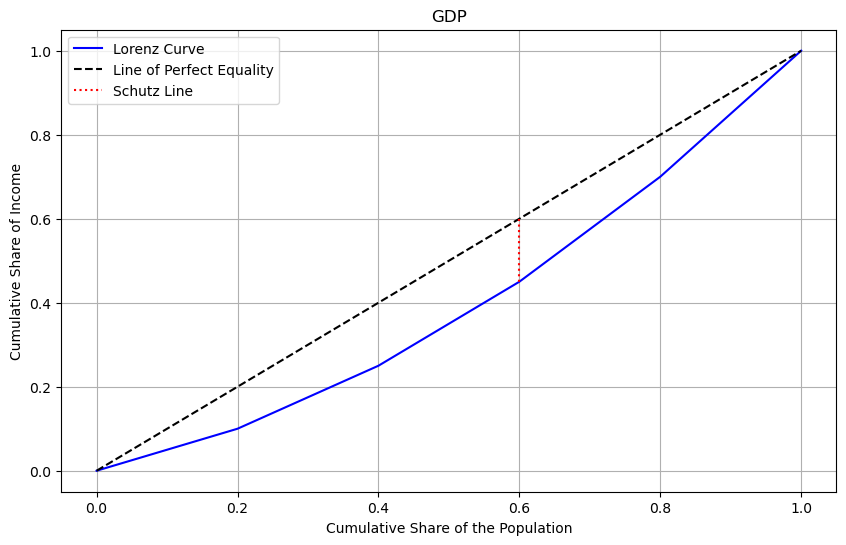

In [10]:
s.plot()

### Increase the inequality

In [11]:
y = numpy.array([20, 50, 80, 100, 100, 100, 100, 120, 150, 180])
df = pandas.DataFrame(data=y, columns=["GDP"])

In [12]:
s = Schutz(df, "GDP")

In [13]:
s.coefficient

np.float64(14.999999999999996)

In [14]:
s.df_processed

,GDP,unit,upct,ypct,ucpct,ycpct,distance,slope,coefficient
0,20,1,0.1,0.02,0.1,0.02,8.000000e-02,0.2,-8.0
1,50,1,0.1,0.05,0.2,0.07,1.300000e-01,0.5,-5.0
2,80,1,0.1,0.08,0.3,0.15,1.500000e-01,0.8,-2.0
3,100,1,0.1,0.10,0.4,0.25,1.500000e-01,1.0,0.0
4,100,1,0.1,0.10,0.5,0.35,1.500000e-01,1.0,0.0
5,100,1,0.1,0.10,0.6,0.45,1.500000e-01,1.0,0.0
6,100,1,0.1,0.10,0.7,0.55,1.500000e-01,1.0,0.0
7,120,1,0.1,0.12,0.8,0.67,1.300000e-01,1.2,2.0
8,150,1,0.1,0.15,0.9,0.82,8.000000e-02,1.5,5.0
9,180,1,0.1,0.18,1.0,1.00,-1.110223e-16,1.8,8.0


In [15]:
s.distance

np.float64(0.15000000000000002)

In [16]:
s.intersection_point

np.float64(0.30000000000000004)

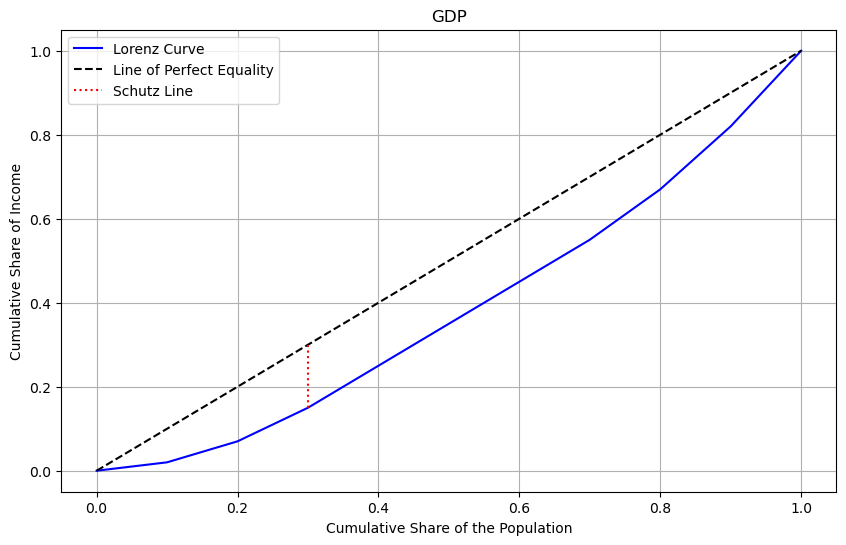

In [17]:
s.plot()

## Visualizing Mexican State Income Inequality

In [18]:
gdf = geopandas.read_file("weighted.shp")

In [19]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,TEST,Name_1,Population,NAMEp,populati_1,Y2000,y2000_1,p,State,geometry
0,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,5.0,Aguascalientes,944285,Aguascalientes,944285,2.623413e+10,27782.0,0.009647,Aguascalientes,"POLYGON ((-101.8462 22.01176, -101.9653 21.883..."
1,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,1.0,Querétaro de Arteaga,1404306,Baja California Norte,1404306,4.192556e+10,29855.0,0.014347,Baja California Norte,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
2,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,2.0,Baja California Sur,424041,Baja California Sur,424041,1.106874e+10,26103.0,0.004332,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
3,15,5.016584e+10,MX04,Campeche,1575361.146,1.239620e+07,5016583.723,3758.0,4929.0,5925.0,...,15.0,Campeche,690689,Campeche,690689,2.497739e+10,36163.0,0.007056,Campeche,"MULTIPOLYGON (((-91.83446 18.63805, -91.84195 ..."
4,22,7.339157e+10,MX05,Chiapas,1477195.199,1.813538e+07,7339157.376,2934.0,4138.0,5280.0,...,22.0,Chiapas,3920892,Chiapas,3920892,3.404903e+10,8684.0,0.040057,Chiapas,"POLYGON ((-91.4375 17.24111, -91.35278 17.1763..."


In [20]:
gdf.columns

Index(['POLY_ID', 'AREA', 'CODE', 'NAME', 'PERIMETER', 'ACRES', 'HECTARES',
       'PCGDP1940', 'PCGDP1950', 'PCGDP1960', 'PCGDP1970', 'PCGDP1980',
       'PCGDP1990', 'PCGDP2000', 'HANSON03', 'HANSON98', 'ESQUIVEL99', 'INEGI',
       'INEGI2', 'MAXP', 'GR4000', 'GR5000', 'GR6000', 'GR7000', 'GR8000',
       'GR9000', 'LPCGDP40', 'LPCGDP50', 'LPCGDP60', 'LPCGDP70', 'LPCGDP80',
       'LPCGDP90', 'LPCGDP00', 'TEST', 'Name_1', 'Population', 'NAMEp',
       'populati_1', 'Y2000', 'y2000_1', 'p', 'State', 'geometry'],
      dtype='object')

In [21]:
s1960 = Schutz(gdf, "PCGDP1960")

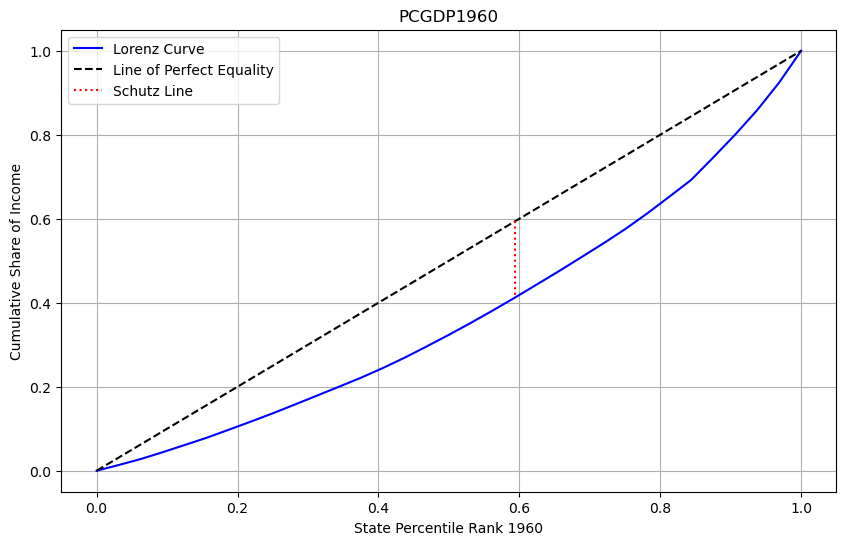

In [22]:
s1960.plot(xlabel="State Percentile Rank 1960")

In [23]:
s2000 = Schutz(gdf, "PCGDP2000")

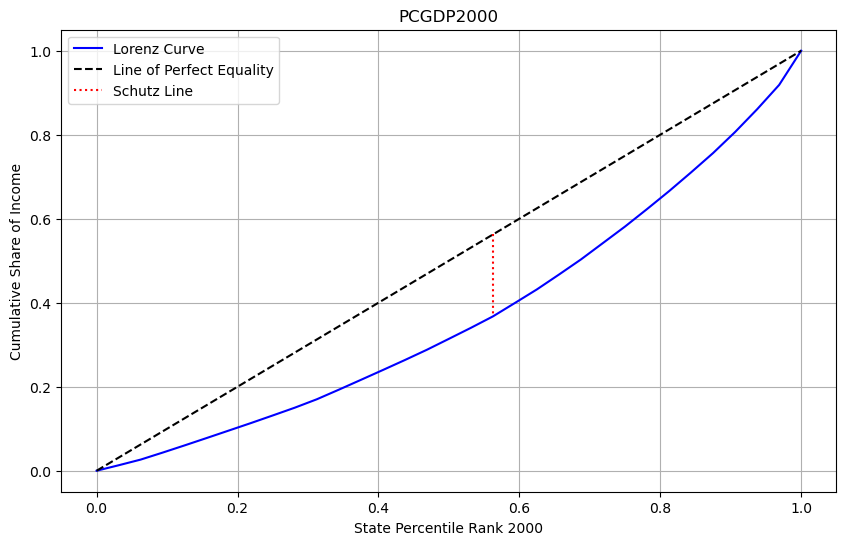

In [24]:
s2000.plot(xlabel="State Percentile Rank 2000")

In [25]:
s1960.coefficient

np.float64(58.09565999182672)

In [26]:
s2000.coefficient

np.float64(62.413744551459686)

In [27]:
s1960.calculate_schutz_distance()

np.float64(0.1815489374744585)

In [28]:
s2000.calculate_schutz_distance()

np.float64(0.1950429517233115)

The location and height of the Schutz line (which is derived from the Lorenz curve) offer key insights into the degree of inequality in a distribution. In the case above, the Schutz line for the first distribution in 1960 is positioned to the right and is shorter than that of the second distribution in 2000, this indicates that the first distribution exhibits **less inequality** than the second one.

Here's how to interpret this:

1. **Position of the Schutz line (to the right)**: The more the line shifts to the right, the greater the share of the population that holds a significant portion of the total income or wealth, meaning less inequality. This suggests that in the first distribution, a larger proportion of the population is receiving a more equitable share of the total resources, compared to the second distribution.

2. **Height of the Schutz line (shorter)**: A shorter Schutz line represents a smaller area between the Lorenz curve and the line of perfect equality (the 45-degree line). Since this area is proportional to the Gini coefficient (a measure of inequality), a shorter Schutz line indicates a **lower Gini coefficient** and thus lower inequality in the first distribution compared to the second.

In summary, the first distribution is more equal, with a larger portion of the state's having a fairer share of the total income, while the second distribution has higher inequality, as reflected in its taller and more leftward-shifted Schutz line.